# Load dataset

In [24]:
import pickle
import torch
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data_path = "test_sine.pkl"
with open(data_path, 'rb') as f:
    data = pickle.load(f)

# Auxiliary Functions

In [25]:
from torch.autograd import Variable
def to_variable(X, cuda=True):
    if isinstance(X, (tuple, list)):
        return tuple(to_variable(x) for x in X)
    else:
        X = Variable(X)
        if cuda:
            return X.cuda().requires_grad_()
        return X.requires_grad_()

# Load model

In [26]:
import stabledynamics  # Replace with the actual name of your model class

# Load the model
model_props = {
    "latent_space_dim": 2,
    "a": 0.001,
    "projfn": "PSD-REHU",
    "projfn_eps": 0.01,
    "smooth_v": 0,
    "hp": 64,
    "h": 64,
    "rehu": 0.005,
    "dt": 1
}
stabledynamics.configure(model_props)  # Replace with the actual name of your model class
model = stabledynamics.model

In [27]:
# Load the state dict
state_dict_path = "st2.pth"
checkpoint = torch.load(state_dict_path)

# Load the model's state dict
model.load_state_dict(checkpoint)
model.eval()

NextStateGenerator(
  (network): Dynamics(
    (fhat): Sequential(
      (0): Linear(in_features=2, out_features=64, bias=True)
      (1): ReLU()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): ReLU()
      (4): Linear(in_features=64, out_features=2, bias=True)
    )
    (V): MakePSD(
      (f): ICNN(
        (W): ParameterList(
            (0): Parameter containing: [torch.float64 of size 64x2]
            (1): Parameter containing: [torch.float64 of size 64x2]
            (2): Parameter containing: [torch.float64 of size 1x2]
        )
        (U): ParameterList(
            (0): Parameter containing: [torch.float64 of size 64x64]
            (1): Parameter containing: [torch.float64 of size 1x64]
        )
        (bias): ParameterList(
            (0): Parameter containing: [torch.float64 of size 64]
            (1): Parameter containing: [torch.float64 of size 64]
            (2): Parameter containing: [torch.float64 of size 1]
        )
        (act): ReH

# Run Predictions

In [28]:
st = data.iloc[1:2]
st['Xt'] = 0.9
st['Xt-1'] = 0.9
start = to_variable(torch.tensor(np.array(st)), cuda=False)
path = []
INDEX = 0
for i in range(1, 1000):
    k1 = model(start)
    k1.detach()
    start = k1
    start.detach()
    print(start[0][INDEX].item())
    path.append(start[0][INDEX].item())

/var/folders/v7/hyz0t0p53z3_ybmq__z2br340000gq/T/ipykernel_64881/2032994804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st['Xt'] = 0.9
/var/folders/v7/hyz0t0p53z3_ybmq__z2br340000gq/T/ipykernel_64881/2032994804.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st['Xt-1'] = 0.9


0.8162919507711348
0.6531032812697796
0.43170378332734183
0.17349067889861453
-0.10360314225645696
-0.3738892622157281
-0.6141409512973529
-0.8027502378699327
-0.9256004364721176
-0.9993077994345907
-1.0808778077703762
-1.2577331668717977
-1.5645416246941273
0.16252522407187042
0.49814229088414314
0.5017213361430753
0.446971577975949
0.36395651999254913
0.25747819238149877
0.12854809749451396
-0.016505908285645396
-0.1776317873486956
-0.3446482086525946
-0.48013853014848695
-0.5711933728306043
-0.6289772633383284
-0.6778289905279896
-0.7300257994252489
-0.7857697568922954
-0.8449145201383471
-0.9056129054355987
-0.9671584380619226
-1.0298396336447995
-1.135807663647448
-1.3976412516104093
-1.5469759245370522
-0.0359350648907768
0.37398000820272204
0.3865168706828651
0.35614771206921825
0.3040085362409756
0.22939344303539505
0.13382492712831684
0.02194725213417778
-0.10717883854082759
-0.24474623342064156
-0.3780360089828208
-0.4704285717668182
-0.5238407366170528
-0.5593458608822045
-0

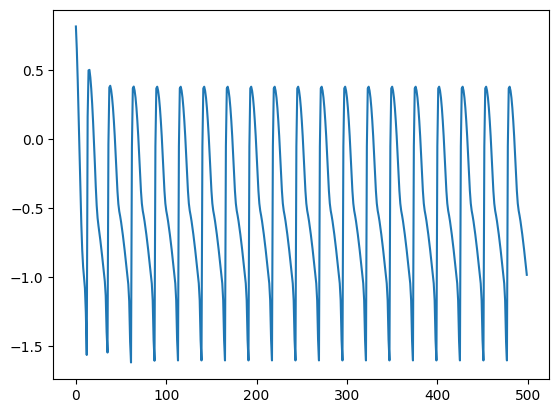

In [29]:
plt.plot(path[0:500])

In [30]:
# total_diff = 0
# for i in range(0, len(path) - 2):
#     total_diff += abs(path[i] - path[i + 1])

# print(total_diff / (len(path) - 2))